**Group members**: Tim Bakkenes, Agnes Magnusson, Elvira Moberg

# Task 1: Working with a dataset with categorical features

The purpose of this assignment is to experiment with how to handle non-numerical features in machine learning tasks. The task given by the dataset is a biary classificaiton task where the goal is to predict if a person has an income above 50 000$/year or below given a number of features.

### Step 1

The first step of step 1 was to download the csv files from the famous **Adult** dataset. One of the files, *adult_train.csv* is the training part of the data and the other, *adult_test.csv*, is the test data. The files were then put in the working director.

Next, pandas was used to read these csv_files and separate the features, X, from the dependent variable we are trying to predict, Y.

In [1]:
import pandas as pd

# Reading the training data
train_data = pd.read_csv('adult_train.csv')

# Number of columns in the training data
n_cols = len(train_data.columns)

# Getting all the columns except the last one which is the target column.
# Also transforms the data to a dictionary that can be passed to the DictVectorizer.
# The target variable can be found in the column "target" in the training data.
X_train_dicts = train_data.iloc[:, :n_cols-1].to_dict('records')
Y_train = train_data["target"]

# Reading the test data, has the same amount of columns as trainig data.
test_data = pd.read_csv('adult_test.csv')
# Doing the same thing as for the training data.
X_test_dicts = test_data.iloc[:, :n_cols-1].to_dict('records')
Y_test = test_data["target"]

When inspecting the features of the transformed training data, X_train_dict, the data is now in the form of dictionaries which is what we want for this assignment.

In [2]:
X_train_dicts[0]

{'age': 27,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Adm-clerical',
 'relationship': 'Unmarried',
 'race': 'White',
 'sex': 'Female',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 44,
 'native-country': 'United-States'}

### Step 2

Step 2 of task 1 was about encoding features as numbers. In the data that can be seen above, some of the features are not numerical values such as the *'native-country'* feature. Scikit-learn model generally need numerical data for them to work as most other models as well. Therefore, we must convert the non-numerical features into numerical ones.

The way this is done is by using *one-hot encoding* which means that each observed value for a non-numerical feature gets assigned a column of its own. Then for each row the column which represents the original feature value of the person is set to 1 and the rest is 0.

There are built-in tools for this in Scikit-learn and the one used for this assignment is called **DictVectorizer**. It is used when the features are stored as named attributes in dictionaries. How to use it is shown below. The **fit_transform** metod is used since we first need to fit the DictVectorizer to the features in our training data, the next time the DictVectorizer is used there is no need to fit it to the data so then **transform** can simply be called.

When looking at the result, *X_train_encoded*, it could look a bit unexpected. However, what it is showing is just a sparse representation of the full matrix of data. In all the new columns created because of the one-hot encoding, there will be a lot of 0s, they are not shown in the output below.

In [3]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
X_train_encoded = dv.fit_transform(X_train_dicts)
print(X_train_encoded)

  (0, 0)	27.0
  (0, 1)	0.0
  (0, 2)	0.0
  (0, 3)	10.0
  (0, 19)	1.0
  (0, 20)	44.0
  (0, 21)	1.0
  (0, 67)	1.0
  (0, 71)	1.0
  (0, 89)	1.0
  (0, 94)	1.0
  (0, 96)	1.0
  (0, 102)	1.0
  (1, 0)	27.0
  (1, 1)	0.0
  (1, 2)	0.0
  (1, 3)	13.0
  (1, 13)	1.0
  (1, 20)	40.0
  (1, 25)	1.0
  (1, 67)	1.0
  (1, 80)	1.0
  (1, 89)	1.0
  (1, 91)	1.0
  (1, 96)	1.0
  :	:
  (32559, 1)	7688.0
  (32559, 2)	0.0
  (32559, 3)	16.0
  (32559, 14)	1.0
  (32559, 20)	45.0
  (32559, 23)	1.0
  (32559, 67)	1.0
  (32559, 74)	1.0
  (32559, 89)	1.0
  (32559, 90)	1.0
  (32559, 97)	1.0
  (32559, 100)	1.0
  (32560, 0)	25.0
  (32560, 1)	2597.0
  (32560, 2)	0.0
  (32560, 3)	10.0
  (32560, 19)	1.0
  (32560, 20)	48.0
  (32560, 25)	1.0
  (32560, 67)	1.0
  (32560, 78)	1.0
  (32560, 89)	1.0
  (32560, 91)	1.0
  (32560, 97)	1.0
  (32560, 102)	1.0


Now that the data only consists of numerical values it is possible to use classification models from Scikit-learn and compute a cross-validation accuracy for the model on the training data. It is done below and the chosen model is the **GradientBoostingClassifier** since it was the one that gave the best results in assignment 1.

To be able to use the test data to figure out the models accuracy on it, it also needs to be transformed. Since the DictVectorizer has already been fitted there is no need to call **fit_transform**. Instead, **transform** is used as shown below.

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import numpy as np

clf_gradient_boost = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=100, max_depth=4)
clf_gradient_boost.fit(X_train_encoded, Y_train)
cvr_gradient_boost = cross_val_score(clf_gradient_boost, X_train_encoded, Y_train)
print(f"Gradient Boosting median cross-validation accuracy on train data: {np.median(cvr_gradient_boost)}")

# Transforming the data
X_test_encoded = dv.transform(X_test_dicts)
Yguess = clf_gradient_boost.predict(X_test_encoded)
print(f"Accuracy score on test data: {accuracy_score(Yguess, Y_test)}") 

Gradient Boosting median cross-validation accuracy on train data: 0.8679361179361179
Accuracy score on test data: 0.8751919415269332


### Step 3

In step 3 the goal is to combine all previous steps and create a so called pipeline. According to the assignment description, the number of preprocessing steps are many and they are chained together. An example of one such step is the one-hot encoding preprocessing step. Coding all of these in a file like this is messy and error prone according to the assignment description and this makes a lot of sense when considering the design principles of Object Oriented Programming. 

A **Pipeline** is a sequence of Scikit-learn modules and is built using the function **make_pipeline**. Below is an example of creating a pipeline that first transforms the features represented as named features in dictionaries and applies one-hot encoding and then uses a gradient boosting classifier. The pipeline can be treated as a normal classifier from Scikit-learn.

In [5]:
from sklearn.pipeline import make_pipeline

# Creating pipeline with two steps
gbc_pipeline = make_pipeline(
  DictVectorizer(),
  GradientBoostingClassifier()
)

gbc_pipeline.fit(X_train_dicts, Y_train)
Yguess_pipeline = gbc_pipeline.predict(X_test_dicts)
print(accuracy_score(Yguess_pipeline, Y_test))

0.8711381364781033


# Task 2: Decision trees and random forests

The purpose of this task is to investigate how sklearn's DecisionTreeClassifier and RandomForestClassifier performs as the tree depth increases, and compare how the underfitting/overfitting of the models compare. It is also analyzed what happens to the result of the train and test data when the number of trees is the random forest increases. 

### Step 1: Underfitting and overfitting in decision tree classifiers

First, the experiment from Task 4 step 4 in Assignment 1 is reproduced but with the dataset used in Task 1 above and scikit-learn's DecisionTreeClassifier instead of our own regression model.

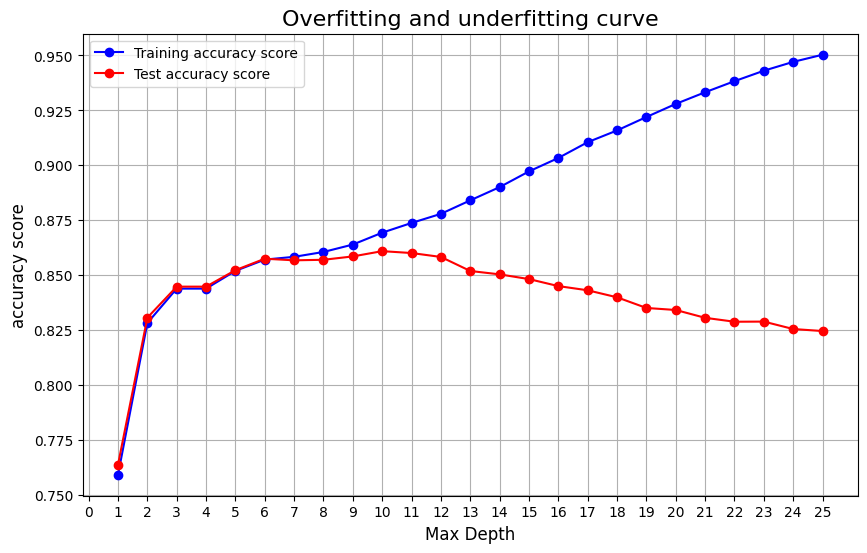

In [14]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def evaluation_score_plot(Xtrain, Ytrain, Xtest, Ytest):
    max_depth_range = range(1, 26)
    train_scores = []
    test_scores = []

#calculates the accuracy score for each tree depth and appends it to the lists to be plotted
    for max_depth in max_depth_range:
        pipeline = make_pipeline(DictVectorizer(),DecisionTreeClassifier(max_depth=max_depth))
        pipeline.fit(Xtrain, Ytrain)
        Yguess_train = pipeline.predict(Xtrain)
        Yguess_test = pipeline.predict(Xtest)
        train_scores.append(accuracy_score(Yguess_train, Ytrain))
        test_scores.append(accuracy_score(Yguess_test, Ytest))

    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, train_scores, label='Training accuracy score', color='blue', marker='o')
    plt.plot(max_depth_range, test_scores, label='Test accuracy score', color='red', marker='o')

    plt.title('Overfitting and underfitting curve', fontsize=16)
    plt.xlabel('Max Depth', fontsize=12)
    plt.xticks([i for i in range(26)])
    plt.ylabel('accuracy score', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()

evaluation_score_plot(X_train_dicts, Y_train, X_test_dicts, Y_test)

Comparing this to the underfitting and overfitting graph in assignment 1, we see the similarity that when the max depth increases, the training data becomes better and better, (memorizing the data) while the test data becomes worse. So it is clear that the model is overfitting.

### Step 2: Underfitting and overfitting in random forest classifiers

In the next step, the same experiment is carried out but instead on a RandomForestClassifier. Here, the effect on the overfitting/underfitting curve is investigated both for increasing tree depth and for increasing ensemble size. 

The code below plots the accuracy score for the training and test data for the ensemble sizes 1, 10, 20, 50, 100, 250 and 500 for the tree depths 1-25. The last plot shows the difference of the training and test set accuracy score for the different ensemble sizes. 

(1, ('blue', 'lightblue'))
(10, ('darkred', 'red'))
(20, ('green', 'lightgreen'))
(50, ('black', 'darkgray'))
(100, ('orange', 'brown'))
(250, ('yellow', 'goldenrod'))
(500, ('orange', 'brown'))


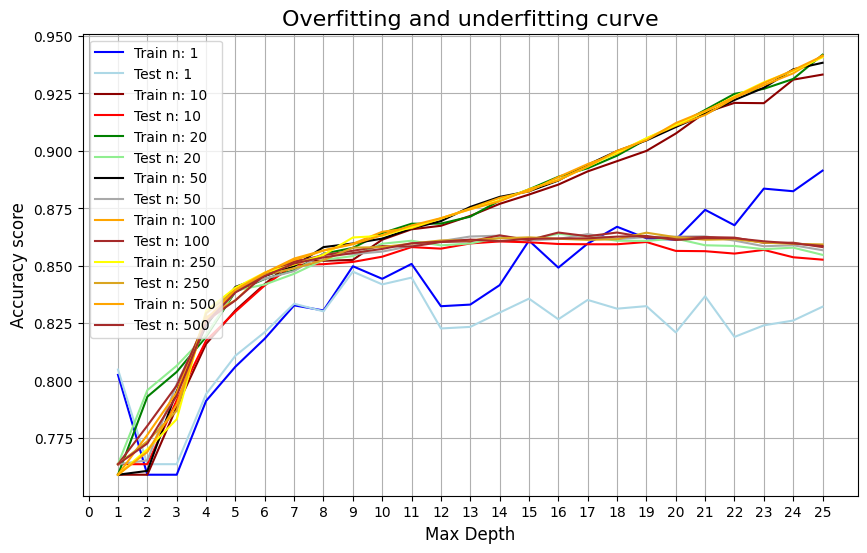

(1, ('blue', 'lightblue'))
(10, ('darkred', 'red'))
(20, ('green', 'lightgreen'))
(50, ('black', 'darkgray'))
(100, ('orange', 'brown'))
(250, ('yellow', 'goldenrod'))
(500, ('orange', 'brown'))


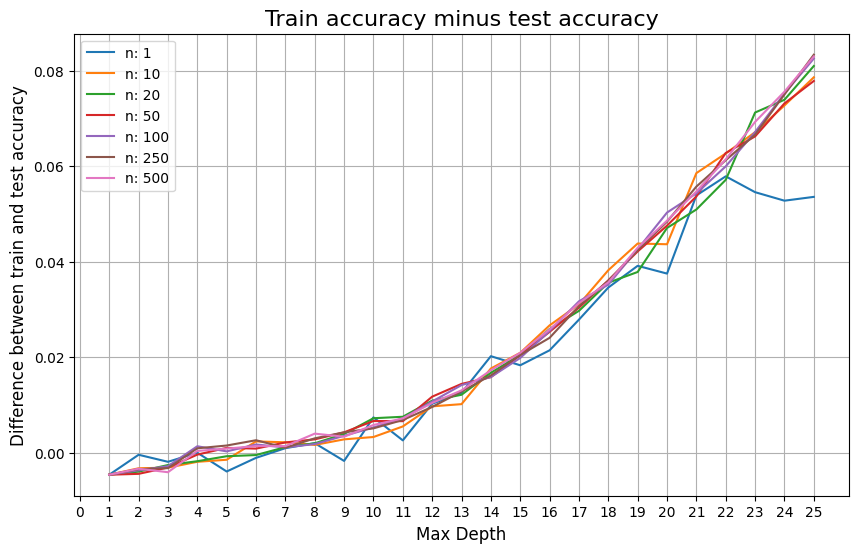

In [7]:
from sklearn.ensemble import RandomForestClassifier


def evaluation_rf_score_plot(Xtrain, Ytrain, Xtest, Ytest, num_estimators_list: list, clf: RandomForestClassifier, print_all_or_diff: bool = True):
    maximum_depth = 26
    max_depth_range = range(1, maximum_depth)
    train_scores = []
    test_scores = []
    alt_metric = []

    plt.figure(figsize=(10, 6))

    for i in range(len(num_estimators_list)):
        num_estimators = num_estimators_list[i]
        print(num_estimators)
        for max_depth in max_depth_range:
            pipeline = make_pipeline(DictVectorizer(),clf(max_depth=max_depth, n_estimators=num_estimators[0], n_jobs=-1))
            pipeline.fit(Xtrain, Ytrain)
            Yguess_train = pipeline.predict(Xtrain)
            Yguess_test = pipeline.predict(Xtest)
            train_accuracy = accuracy_score(Yguess_train, Ytrain)
            test_accuracy = accuracy_score(Yguess_test, Ytest)
            train_scores.append(train_accuracy)
            test_scores.append(test_accuracy)
            alt_metric.append(train_accuracy - test_accuracy)

        if print_all_or_diff:
            plt.plot(max_depth_range, train_scores, label=f'Train n: {num_estimators[0]}', color=num_estimators[1][0])
            plt.plot(max_depth_range, test_scores, label=f'Test n: {num_estimators[0]}', color=num_estimators[1][1])
        else:
            plt.plot(max_depth_range, alt_metric, label=f'n: {num_estimators[0]}')

        train_scores = []
        test_scores = []
        alt_metric = []

    if print_all_or_diff:
        plt.title('Overfitting and underfitting curve', fontsize=16)
        plt.ylabel('Accuracy score', fontsize=12)
    else:
        plt.title('Train accuracy minus test accuracy', fontsize=16)
        plt.ylabel('Difference between train and test accuracy', fontsize=12)

    plt.xlabel('Max Depth', fontsize=12)
    plt.xticks([i for i in range(maximum_depth)])
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.show()


num_estimators_l = [(1, ("blue", "lightblue")), (10, ("darkred", "red")), (20, ("green", "lightgreen")), (50, ("black", "darkgray")), (100, ("orange", "brown")), (250, ("yellow", "goldenrod")), (500, ("orange", "brown"))]
evaluation_rf_score_plot(X_train_dicts, Y_train, X_test_dicts, Y_test, num_estimators_l, RandomForestClassifier)
evaluation_rf_score_plot(X_train_dicts, Y_train, X_test_dicts, Y_test, num_estimators_l, RandomForestClassifier, False)


The code below shows the same thing as above, but splits the different ensemble sizes into different subplots using matplotlibs subplot function **plt.subplots**. 

1
2
5
10
20
50
100
200
500


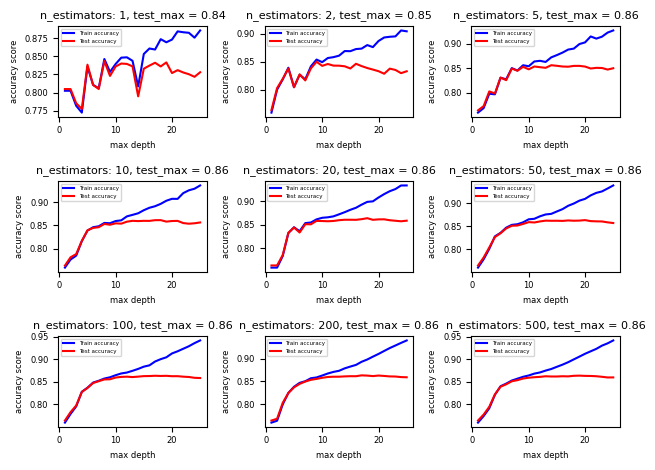

In [8]:
def evaluation_rf_score_plot(Xtrain, Ytrain, Xtest, Ytest, num_estimators_list: list, clf: RandomForestClassifier):
    maximum_depth = 26
    max_depth_range = range(1, maximum_depth)
    train_scores = []
    test_scores = []

    figure, axis = plt.subplots(3, 3)

    for i in range(len(num_estimators_list)):
        num_estimators = num_estimators_list[i]
        print(num_estimators)
        for max_depth in max_depth_range:
            pipeline = make_pipeline(DictVectorizer(),clf(max_depth=max_depth, n_estimators=num_estimators, n_jobs=-1))
            pipeline.fit(Xtrain, Ytrain)
            Yguess_train = pipeline.predict(Xtrain)
            Yguess_test = pipeline.predict(Xtest)
            train_scores.append(accuracy_score(Yguess_train, Ytrain))
            test_scores.append(accuracy_score(Yguess_test, Ytest))
        
        #subplot for each number of estimators    
        row = i // 3
        col = i % 3
        axis[row][col].title.set_text(f"n_estimators: {num_estimators}, test_max = {round(max(test_scores), 2)}")
        axis[row][col].title.set_size(8)
        axis[row][col].plot(max_depth_range, train_scores, label='Train accuracy', color="blue")
        axis[row][col].plot(max_depth_range, test_scores, label='Test accuracy', color="red")
        axis[row][col].xaxis.set_tick_params(labelsize=6)
        axis[row][col].yaxis.set_tick_params(labelsize=6)
        axis[row][col].set_ylabel('accuracy score', fontsize=6)
        axis[row][col].set_xlabel('max depth', fontsize=6)
        axis[row][col].legend(loc="upper left", fontsize=4)
        axis[row][col]
        train_scores = []
        test_scores = []

    plt.tight_layout()
    plt.show()

num_estimators_l = [1, 2, 5, 10, 20, 50, 100, 200, 500]
evaluation_rf_score_plot(X_train_dicts, Y_train, X_test_dicts, Y_test, num_estimators_l, RandomForestClassifier)

**What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?**

We can see a big difference between the graph of the decision tree and the graph of the random forest with n_estimators set to 1. The random forest graph fluctuates much more than the decsion tree. This might be for the reason that the decision tree classifier chooses to split based on the most useful feature, which means the feature that gives the most homogeneous subsets. On the other hand, the random forest classifier chooses a random subset of features for each tree, a method called feature bagging, which can result in a subset that does not necessarily include the features that results in the best split. This might be an explanation to why the curves fluctuate. The fluctuation can also be a result of bootstrap sampling, which means that the model chooses a random subset of data points from the orgininal dataset. Thus, the tree is not trained on the whole data and this might be a reason to the difference from the decision tree graph where the whole dataset is used. 
 

**What happens with the curve for random forests as the ensemble size grows?**

When the number of trees increases, the random forest classifier becomes more stable. This is because each tree is trained on random subsets of features and data points, and the trees complement each other by aggregating the outputs using voting or averaging of probabilities to determine the result. This reduces the overall variance and results in the output becoming more stable. At first, the graph can improve quickly when more trees are addded, but after a certain point it only gives a small effect on the result when adding more trees.
 

**What happens with the best observed test set accuracy as the ensemble size grows?**

For ensemble size 1 the best test accuracy is 0.84, and for 2 the best test accuracy is 0.85. For ensamble sizes 10 and higher the best observed test accuracy stays at 0.86. When the model reaches a certain amount of trees it reaches the limit of its ability to generelize and thus adding more tress makes a minimal improvement. As discussed above the accuracy improves when more trees complement each others results to reduce the variance. 

One interesting thing is that it does not seem to drop as the ensemble size grows. After a certain number of trees have been added, it seems to not make a difference to add any extra or remove any performance to add more trees.


**What happens with the training time as the ensemble size grows?**

For the below figure we calculated the training time of the RandomForestClassifer for ensemble sizes 1-49. This was done by calculating the difference of the time when the training function was done and the training function was called using the function time() in the time module. The figure below shows that the training time for the random forest classifier increases almost linearly with ensamble size. This makes sense since every added tree is trained independently on a new random subset (bootstrap sample) of the original data set, adding approximately the same amount of time for each tree to the total traning time. A similar result was achieved when changing the *n_jobs* parameter to -1 so that all available cores are used. The reason that the time graph changes a bit each time the code is run is also that the training is done on different random subsets of the original data set each time. 

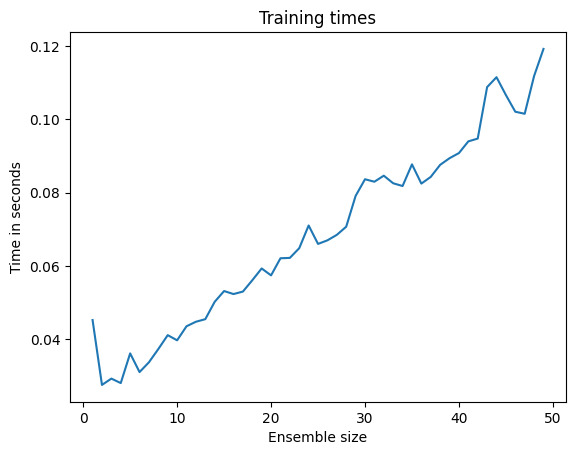

In [12]:
import time

training_times = []
 
for i in range(1,50):
    rfc = RandomForestClassifier(max_depth=6, n_estimators=i)
    start_time = time.time()
    rfc.fit(X_train_encoded, Y_train)
    end_time = time.time()
    training_times.append(end_time-start_time)

plt.title("Training times")
plt.ylabel("Time in seconds")
plt.xlabel("Ensemble size")

plt.plot(range(1,50), training_times)
    

# Task 3: Feature importances in random forest classifiers

Decision trees and ensemles of decision trees are trained by computing the importance for individual features according to the assignment description. There are a couple of ways to do this, the ones mentioned in the assignment are: *Gini impurity*, *variance reduction* and *information gain*.

The goal of task 3 is to print these importance scores to see which features are good for discriminating between classes. When working with ensembles of decision trees like Random Forests the values that will be shown are the averages of the importance for all the decision trees in the ensemble. How this can be done is shown below. 

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline

max_depth = 10
clf = RandomForestClassifier(random_state=42, max_depth=max_depth, n_estimators=500, n_jobs=4)
dict_vectorizer = DictVectorizer()

pipeline = make_pipeline(dict_vectorizer, clf)

pipeline.fit(X_train_dicts, Y_train)

name_score = zip(pipeline.steps[0][1].feature_names_, pipeline.steps[1][1].feature_importances_)
print(name_score)
sorted_name_scores = sorted(name_score, key=lambda x: -x[1])
print(sorted_name_scores)

[('capital-gain', 0.1661463320375614), ('marital-status=Married-civ-spouse', 0.14466565433408707), ('education-num', 0.10745969230447039), ('relationship=Husband', 0.10499168475512212), ('age', 0.06283447297880407), ('marital-status=Never-married', 0.05031224308701346), ('hours-per-week', 0.041211018897115106), ('capital-loss', 0.03274879259886728), ('occupation=Exec-managerial', 0.02837322947084408), ('occupation=Prof-specialty', 0.024232088369786253), ('relationship=Not-in-family', 0.02263569237361574), ('education=Bachelors', 0.02199173598725969), ('relationship=Wife', 0.019658596244451938), ('relationship=Own-child', 0.019330217728857138), ('sex=Male', 0.016913493883361903), ('sex=Female', 0.015278083975882515), ('education=Masters', 0.012855542561801709), ('education=HS-grad', 0.00986595922688306), ('marital-status=Divorced', 0.009323448232597608), ('occupation=Other-service', 0.008403444102122196), ('education=Prof-school', 0.008025576770039816), ('relationship=Unmarried', 0.0079

**Reasoning About Result**

As can be seen above, the first few features that are the best for discriminating between the classes are *capital-gain*, *marital-status=Married-civ-spouse*, *education-num*, *relationship=Husband* and *age*. They do seem to make some sense but there are certainly other factors that we expected would have a larger impact. 

For example education-num which represents the education level is something that we would expect to be a good feature to discriminate between the two classes of low and high income earners. The same goes for age as generally speaking, up to a certain age, salaries tend to increase as you age. The capital-gain feature also seemed to be good for discriminating between the two classes. Perhaps only the people with a high income from the beginning have had the oppurtunity to put money into the stock market for example to earn some capital gains which would explain why it is a good feature for discriminating between the features.

*marital-status=Married-civ-spouse* is the next best feature to discriminate between the classes which is a feature that basically says if a individual is married and living with a spouse or not. It seems that depending on if that is the situation of the individual or not has a big impact on whether or not the person is a high income earner or not. In order to figure out if there is a positive or negative correlation some statistical analysis on the values of the target variable and the *marital-status=Married-civ-spouse* feature would have to be done.

Whether or not a person has the relationship status *husband* also seems to be a good feature to discriminate between the two classes. It also makes sense since people who are husbands are typically not the youngest for example and overall there have been surveys that show that married men make more money than not married men in the US.

Another interesting thing to think about is that the features are overlapping in a sense. For example, if it is known that the relationship status of the person is *husband*, the *sex* feature does not add any information. This was found interesting since it could explain why some other features we originally thought would be more important are further down the list. A lot of these factors comes after the top 5 listed.


**Alternative way to compute the importance score of the individual features**

The most common way of computing the importances of the features according to the discussion by Parr et al. (2018) is to use the mean decrease in impurity, also known as gini importance. It is also the one used as a default for decision trees in Scikit-learn. This metric is a measure of how effective the feature is at reducing uncertainty when we create decision trees within Random Forest classifiers. According to Parr et al. (2018), it has been known for years that this way of computing feature importance is biased and can inflate the importance of features that are continous or what Parr et al. (2018) call high-cardinality categorical variables, basically variables with a lot of unique values. However, in the case of this assignment when one-hot encoding has been used there will not be any column where a lot of different categorical values are allowed so it might not be applicable for categorical values in this case. However, for exampel the *capital-gain* feature might be inflated in importance because of this. In the case of the continous variable, since there are so many values to choose from, opposed to there only being a few for other features, it is more likely that there is a value among these that create a split that lowers the gini impurity, simply because there are much more values to choose from. In the case with the categorical features in this assignment, since one-hot endocing is used there are only two possible values and that would mean, according to information from Parr et al. (2018), that those values are not inflated.

In order to combat this, Parr et al. (2018) propose the use of something called **permutation importance**. It takes more computation but is a very reliable technique according to Parr et al. (2018). It measures the feature importance by randomly shuffling each feature and observing the effect it has on the target variable. The technique can be used in a lot of situations since it does not rely on the parameters of the model or what kind of model that is being used which is definitely a plus. It simply works by changing the values in the data and looking how that affects the performance. In more detail, first a baseline is taken by not permuting the data, then for a single feature, the column values are permuted in the test data and then the accuracy is recomputed on this test data. The importance of the feature will be the difference between the baseline and the accuracy after the permuation has been done according to Parr et al. (2018).

Another method described in Parr et al. (2018) is something called **drop-column importance**. It works similarly to the permutation importance method but instead of permuting the values of a column the column is dropped, which means that it is not used during training. If the performance becomes much worse, the feature was important. According to Parr et al. (2018), this is a very expensive procedure so perhaps it all depends on the amount of data and the number of features which one should be used.

In [11]:
# This is the permutation importance function explained in Parr et al. (2018)
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)